['./checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.2/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.8/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.5/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.7/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.9/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.4/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.6/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.75/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.3/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta0.1/metadata.json', './checkpoints/supervised/pets_entropy_bottleneck_1.0_supervised_beta1.0/metadata.json']
[[1.58739765e+04 7.

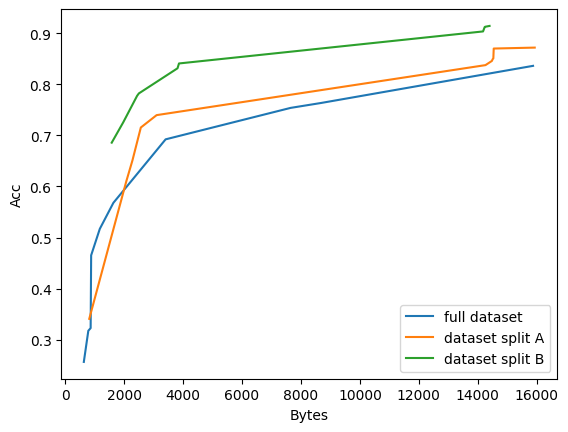

In [124]:
#rsync -v -r --info=progress2 -f '+ *.json' -f '- *.pth.tar' juliano@iasl-mlserver2021.ics.uci.edu:/home/juliano/workspace/split_mobilenetv3/checkpoints .

import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy


def plot_curve(files, name=""):
    print(files)
    acc = []
    rate = []
    for f in files:
        with open(f, "r") as fp:
            j = json.load(fp)
            if 'best_top1' in j:
                acc.append(j['best_top1'])
                rate.append(j['best_bytes'])
    
    data = np.array([rate, acc])
    data[1] = data[1]/100
    
    print(data)
    data.sort()
    
    print(data)
    
    plt.plot(data[0], data[1], label=name)

files = glob.glob('./checkpoints/supervised/pets_*/metadata.json')
plot_curve(files, name='full dataset')

files = glob.glob('./checkpoints/supervised_a2/pets_*/metadata.json')
plot_curve(files, name='dataset split A')

files = glob.glob('./checkpoints/supervised_b2/pets_*/metadata.json')
plot_curve(files, name='dataset split B')

plt.xlabel("Bytes")
plt.ylabel("Acc")
plt.legend()

[[3031.1304347826085, 69.22867007813099], [3048.695652173913, 68.6290514299544], [2903.4202898550725, 67.45707061031463], [3004.985507246377, 66.72117528658077], [2974.144927536232, 66.53038863012856], [2811.3623188405795, 65.71272618129228], [2825.913043478261, 64.56800068428744], [2744.231884057971, 63.39601901000577], [2793.449275362319, 61.869717973036934], [2626.0289855072465, 61.32461019470764], [2625.391304347826, 59.662031739828336], [2548.521739130435, 58.40828398535316], [2567.942028985507, 56.74570592036524], [2458.6666666666665, 55.600979693483744], [2469.7971014492755, 54.701552452655086], [2387.014492753623, 53.311527760615625], [2259.072463768116, 48.16026029797333], [2265.7391304347825, 48.16026051319338], [2274.2608695652175, 48.160260603648176], [2243.6521739130435, 48.160260117063736]]
[[3079.6923076923076, 74.83988706932521], [2946.3076923076924, 74.06221226084047], [2904.3076923076924, 73.60475455351303], [2888.923076923077, 72.82707775566192], [2944.769230769231, 

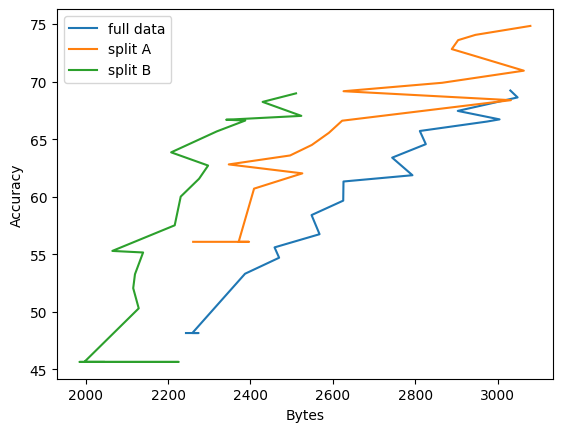

In [11]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy

def plot_summary(f, label=""):
    with open(f, "r") as fp:
        a = json.load(fp)
        data = []
        for k, v in a.items():
            data.append([v["val_bytes"], v["val_top1"]])
        print(data)
        data = np.array(data)
        plt.plot(data.T[0], data.T[1], label=label)



plot_summary('../checkpoints/test/pets_gain_bottleneck_default/eval_summary.json', "full data")
plot_summary('../checkpoints/test/pets_a2_gain_bottleneck_a2_default/eval_summary.json', "split A")
plot_summary('../checkpoints/test/pets_b2_gain_bottleneck_b2_default/eval_summary.json', "split B")

plt.xlabel("Bytes")
plt.ylabel("Accuracy")

plt.legend()
